# CrypTone: Predicting Bitcoin Currency Fluctuations Using GDELT News Data

<br>
<br>
submitted by:
Elmer Joaquin <br>
Nisarg Nigam <br>
Adrian Perez <br>
Joanna Quinto <br>

### Executive Summary

Cryptocurrency, bitcoin in particular, has sparked the journey of decentralized payment system using blockchain technology. Today, big eCommerce  companies has already adapted accepting bitcoins as mode of payment for some of their products. While some traders and investors may see this as the currency of the future, others are still skeptic and intrigued with this cryptocurrency, primarily because of its extremely volatile behavior. As such, can we use Big Data and machine learning to effectively forecast bitcoin prices? In this project, the we aim to answer this problem by estimating bitcoin price based on the daily global news and events from GDELT and Bitcoin trading information. A total of 2.5TB of raw GDELT data was collected, which was reduced to 148GB after filtering. This data was then preprocessed to extract the average daily tone components of the global events. These features were included for the model training. The forecasting setup was done for a 1-day, 3-days, and 7-days ahead from our present information. The team found that using Gradient Boosting Regressor is the best model with an RMSE of 251.63. This surpassed the baseline MAE produced by ARIMA, which is at 272.60. On the other hand, XGBoost Regressor was the best predictor for the 3-days and 7-days forecast. It was found that our models get less accurate when our predictions get further into the future we may account this behavior to the reducing significance of a news article as time progresses. Lastly, the news structure (e.g. activity and self/group reference density) are found to be the most important sentiments from our news data.
<br>
<br>
We believe that this project could serve as a guide for both new and experienced crypto traders. However, profitability may still be increased if we will further develop this project. As a recommendation, we are encouraging future researchers to expand the data that was used for training in order to capture more bitcoin movements, and incorporate neural networks in the model to further increase the performance of our models. Lastly, consider more journalistic parameters in our news data. This could unlock more insights and may lead us to conclusive factors that could ve correlated with the volatile movements of bitcoin data.

### Introduction

**Bitcoin** (BTC) is the first cryptocurrency that was created, distributed, traded, and stored with the use of decentralized ledger system known as blockchain. It was released in the year 2009 and follows the ideas set out in the journal paper authored by the pseudonymous Satoshi Nakamoto [1]. As of this writing, there are already 18.5 million BTC circulating supply, out of the total 21 million BTC [2]. Bitcoin reached its all-time high price at about \\$42,000 on Friday, January 8, 2021. This beats December 2017's peak price at about \\$20,000 before it plunged back to $7,000 in the first quarter of 2018. Because cryptocurrencies are not really pegged to economic performances like the stock market, the perpetual crash and peak of cryptocurrencies are more likely driven by their intrinsic values. These fluctuations are often  attributed to by its mining rate, supply & demand, regulatory changes, competing cryptos, and information contained in the daily news [3].

With the assumption that media influence and events have effects on the behavior of the bitcoin price performance, our team aims to predict as accurate as possible, the price of bitcoin tomorrow based on the overall sentiment of today's news and events. This will be done using Big Data analytics and Machine Learning technologies and procedures. The datasets used in this project are from GDELT, for world events, and Investing.com for the bitcoin prices over the years.

### Data Description

**Global Database of Eevents, Language, and Tone** (GDELT) is a catalog that monitors the world's broadcast, print, and web news from nearly every corner of every country in over 100 languages and identifies the people, locations, counts, themes, sources and events every day [4]. To be specific, we have used the Global Knowledge Graph (GKG) version 2.1, which contains more information about the event than the ones contained in the standard events database. We have extraced the GDELT data from [`Registry of Open Data on AWS`](https://registry.opendata.aws/gdelt/), hosted by Amazon. For the purpose of this study, we have only used certain features as listed in Table 1.

<br>
<br>
<center><b>Table 1. GDELT GKG Data</b></center>

| Feature | Data Type| Description |
| :-----: | :------: | :---------: |
| GKGRECORDID | String | A globally unique identifier for each event, following the “YYYYMMDDHHMMSS-X” or “YYYYMMDDHHMMSS-TX” format |
| V2.1DATE | Integer | The timestamp on which the news media used to contruct the GKG file was published in YYYYMMDDHHMMSS format |
| V2SOURCECOLLECTIONIDENTIFIER | Integer | A numeric identifier for the source of the event (i.e., 1=web, 2=citationonly, 3=core, 4=dtic, 5=jstor, 6=nontextualsource) |
| V2SOURCECOMMONNAME | String | The human-readable identifier of the event source |
| V1THEMES | String | The list of all themes found in the document separated by semi-colon |
| V1LOCATIONS | String | The list of all locations found in the document, with each element separated by semi-colon |
| V1.5TONE | String | A comma-delimited list of six core emotional dimensions values (float and integer) |


<br>
<br>
To further elaborate on the `Tone` features as this will be one of the primary elements that will be used for the prediction, see Table 2 for the description of each elements under the `Tone` component.

<br>
<br>
<center><b>Table 2. V1.5TONE Data</b></center>

| Feature | Data Type| Description |
| :-----: | :------: | :---------: |
| Positive Score | Float | The percentage of all words in the article that were found to have a positive emotional connotation | 
| Negative Score | Float | The percentage of all words in the article that were found to have a positive emotional connotation |
| Tone | Float | The average "tone" of the document as a whole, calculated as `Positive Score` minus `Negative Score` |
| Polarity | Float | The percentage of words that had matches in the tonal dictionary as an indicator of how emotionally polarized or charged the text is |
| Activity Reference Density | Float | the percentage of words that were active words offering a very basic proxy of the overall “activeness” of the text |
| Self/Group Reference Density | Float | The percentage of all words in the article that are pronouns, capturing a combination of self-references and group-based discourse |
| Word Count | Integer | Total number of words in the document |

The range of GDELT data used in this project is from 2016 to 2019. Table 3 shows the summary of the raw dataset size in Gigabyte unit. It can be observed that the 2019 data is only 234GB in size, compared to other years where it is about 1TB. This is because the GDELT dataset in the AWS public repository only contains entries for up to the first half of April 2019.

<br>
<br>
<center><b>Table 3. Raw GDELT Data Size</b></center>

| Year | Size (GB)|
| :--: | :------: |
| 2019 | 234 |
| 2018 | 917 |
| 2017 | 1023 |
| 2016 | 1200 |
| **Total** | 2554 |

For the bitcoin dataset, we have extracted data from [**Investing.com**](https://ph.investing.com/crypto/bitcoin/btc-usd). It is an online news website that provides real-time financial information such as portfolio, streaming charts, financial news, live stock market, and of course, cryptocurrency data. We have also used 2016 to 2019 data and it totaled to  `152KB` in size. The features extracted for the bitcoin data are listed in Table 4.

<br>
<br>
<center><b>Table 4. Bitcoin Data</b></center>

| Feature | Data Type| Description |
| :-----: | :------: | :---------: |
| Timestamp | Datetime | Timestamp of the transaction
| Price | Float | Closing price of the bitcoin |
| Open | Float | Opening price of the bitcoin |
| High | Float | Highest bitcoin price for the given timeframe |
| Low | Float | Lowest bitcoin price for the given timeframe |
| Volume | Float | Total trading volume for the given time frame |

### Methodologies

To achieve our objective of using Big Data to produce a forecasting model for Bitcoin prices, we designed a methodology pipeline as shown in Figure xx. The data that we have used for this methodology came from the `GDELT database` and `Historical bitcoin prices` from investing.com. On the other hand, we used Big Data tools such as `Dask`, `PySpark` and `Amazon Web Service` to make our data preprocessing faster. 
<br><br>
Our methodology is shown below:
   - `Data Collection` : Download and parse daily BTC and GDELT data from their dedicated repositories.
   - `Data Clearning & Preprocessing` : Transform data for easier operability to our machine learning models. Here, dataframes for different forecasts are produced.
   - `Exploratory Data Analysis`: Plots of the data shall be examined to understand the nature of the data and derive insights from them.
   - `Model Training`: Machine Learning models are trained using the 70-30 train-test split of our produced data.
   - `Model Evaluation`: Examine the performance of the machine learning models by computing their Root Mean Square Errors (RMSE) and Mean Absolute Error (MAE).
<br><br>
<img src='./img/methodology.PNG'>

<center><b>Figure 1. Project Methodology</b></center>

### Data Collection

As mentioned in the previous `Data Description` section, the datasets were acquired from [`Registry of Open Data on AWS`](https://registry.opendata.aws/gdelt/) for the GDELT data, and [`Investing.com`](https://ph.investing.com/crypto/bitcoin/btc-usd) for the bitcoin data. The GDELT data however was further reduced by filtering news and events that have the following locations: `US`, `Romania`, `China`, `Spain`, `Japan`, `Switzerland`, `South Korea` because these are the countries that hold the most bitcoins [5]. Given this information, we hypothesize that events from these countries have bigger effect to the performance of the bitcoin. The summary of the filtered dataset size is displayed in Table 5.

<br>
<br>
<center><b>Table 4. Filtered GDELT Data Size</b></center>

| Year | Size (GB)|
| :--: | :------: |
| 2019 | 10 |
| 2018 | 41 |
| 2017 | 47 |
| 2016 | 50 |
| **Total** | 148 |

For this study,we used `Distributed Dask` to perform our data computations. Having the local machine as a client, we have employed a dask scheduler with 10 workers. Each worker has a `t2.large` configuration which has 8 GB of memory and 2 CPUs [6] which gives us a total of 20 cores and approximately 80GB of computing power. Figure 2 displays the status of our dask cluster during the time of project implementation.

<img src='./img/dask_cluster.PNG'>

<center><b>Figure 2. Distributed Dask Cluster Summary</b></center>

The codes used in the data collection and filtering can be found in the  `LT3_BDCC Final Project_Data Collection`notebook.

### Data Cleaning and Preprocessing

For this procedures, Amazon Elastic Map-Reduce (EMR) or Spark clusters were employed. The cluster has 1 master and 8 cores in which all are of m4.large instance. Each instance has 2 CPUs and 8GB memory [7], which gives us a total of 16 cores (CPU) and approximately 64GB of computing power.

#### GDELT Data

The GDELT entries are updated every 15 minutes. Since we are aiming to predict the next day's bticoin price based on the overall sentiment of today's news and events, we need to transform the data into day-interval instead of the current 15-minute interval. This could be done by aggregating the data per day and getting the average of the `Tone` components. But before we can do this, we need to do the following preprocessing procedures first:

1. Convert the `Timestamp` value to per-day basis by simply removing the time component at the end of the string.
2. Segment the `Tone` component which is initially in a comma-separated format.
3. Convert each component values to `Float` data type.
3. Perform the aggregation method.

The resulting dataset should have 365 rows (366 for the year 2016 due to leap year), with each row corresponding to 1 day of the year. The averaged tone values are then saved into a separate  csv files for further processing.

The codes used in this cleaning and preprocessing procedures can be found in the  `LT3_BDCC Final Project_Data Preprocessing` notebook.

#### Bitcoin Data

The Bitcoin is a non-stop trading entity. As such, we cannot particularly bin values in reference to our preset timescale. However, we need to matched the timescale of our GDELT data and group the Bitcoin information on daily context. The data that was found in [**Investing.com**](https://ph.investing.com/crypto/bitcoin/btc-usd) was already binned per day. Thus, we used this information to relate daily news information with Bitcoin data.

### Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

import pandas as pd
from numpy.random import seed
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
seed(42)

# Get the best parameter
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from scipy.stats import boxcox
from math import sqrt
import numpy

# Run Arima
from pandas import Series
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot

from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy
from sklearn.metrics import mean_absolute_error

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Here, we explore our data and determine any potential pattern or definitive behavior of our prepared data set. It is assumed that the insights that we will gather on this section will help us understand the performance results of our machine learning models

In [2]:
# load the data
df = pd.read_csv('./preprocessed/df_unscaled.csv', parse_dates=['timestamp'],
                 index_col=[0]).sort_values(by='timestamp')

df.head()

,timestamp,tone_1,tone_2,tone_3,tone_4,tone_5,tone_6,tone_7,Price,Open,High,Low,Vol.,Change %
0,2016-01-01,-1.343669,2.655836,3.999505,6.655342,21.979880,0.775952,607.957274,434.0,429.0,436.5,426.3,12.97,1.16
1,2016-01-02,-1.244109,2.645901,3.890009,6.535910,22.072250,0.821951,605.368377,432.7,434.0,435.8,430.0,6.38,-0.29
2,2016-01-03,-1.431284,2.522918,3.954202,6.477120,21.925045,0.843433,617.556213,428.7,432.7,433.1,422.0,19.18,-0.93
3,2016-01-04,-1.526447,2.471740,3.998187,6.469927,21.797835,0.768344,553.286337,432.9,428.6,435.7,427.0,13.02,0.99
4,2016-01-05,-1.598543,2.436420,4.034963,6.471383,22.078865,0.735785,538.866279,431.8,432.9,434.9,428.2,11.22,-0.24


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1200
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  1201 non-null   datetime64[ns]
 1   tone_1     1201 non-null   float64       
 2   tone_2     1201 non-null   float64       
 3   tone_3     1201 non-null   float64       
 4   tone_4     1201 non-null   float64       
 5   tone_5     1201 non-null   float64       
 6   tone_6     1201 non-null   float64       
 7   tone_7     1201 non-null   float64       
 8   Price      1201 non-null   float64       
 9   Open       1201 non-null   float64       
 10  High       1201 non-null   float64       
 11  Low        1201 non-null   float64       
 12  Vol.       1201 non-null   float64       
 13  Change %   1201 non-null   float64       
dtypes: datetime64[ns](1), float64(13)
memory usage: 140.7 KB


#### Percent Change

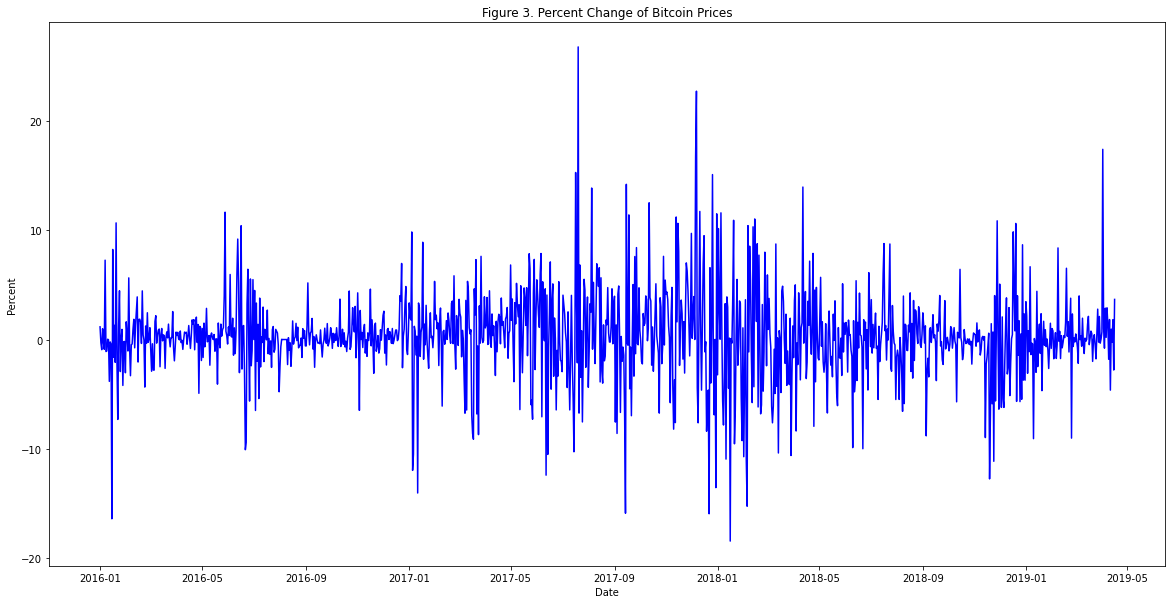

In [4]:
# percent change beahviour
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(df.timestamp[:], df['Change %'][:], 'b-', label='Change %')
plt.title('Figure 3. Percent Change of Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Percent')
plt.show()

Referring to Figure 3, it shows how volatile is the change of Bitcoin. Through visual observation, we may conclude that there is no obvious pattern that can be derived from the data. This observed volatility is a challenge in this project's objective of forecasting bitcoin prices.

#### Price Change

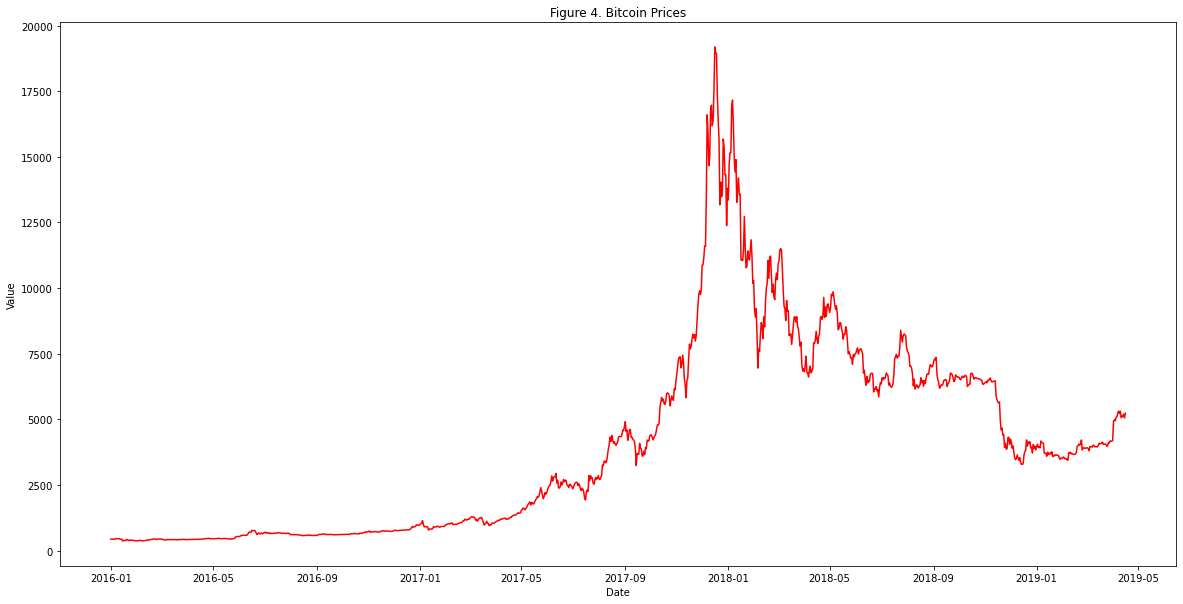

In [5]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(df.timestamp[:], df['Price'][:], 'r-', label='Change %')
plt.title('Figure 4. Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

Figure 4 shows that bitcoin is bullish on the last quarter of 2017 up to the first quarter of 2018. However, the prices started to crash on the same quarter, demonstrating the volatility of cryptocurrency.

#### Baseline Machine Learning Model

**ARIMA** or Autoregressive integrated moving average is used as the baseline for this project for two primary reasons: first, it is the most basic forecasting model that is commonly used in some published papers and second, it predicts the next value by simply taking note of the values in the last timesteps with no regard to other features.

##### Data Preparation

In [6]:
# preparing the data
# align prices tomorrow to sentiments/tone of today
df1_feat_1 = df[1:].loc[:, 'tone_1':'Vol.'].reset_index(drop=True)
df1_feat_1.head()

,tone_1,tone_2,tone_3,tone_4,tone_5,tone_6,tone_7,Price,Open,High,Low,Vol.
0,-1.244109,2.645901,3.890009,6.535910,22.072250,0.821951,605.368377,432.7,434.0,435.8,430.0,6.38
1,-1.431284,2.522918,3.954202,6.477120,21.925045,0.843433,617.556213,428.7,432.7,433.1,422.0,19.18
2,-1.526447,2.471740,3.998187,6.469927,21.797835,0.768344,553.286337,432.9,428.6,435.7,427.0,13.02
3,-1.598543,2.436420,4.034963,6.471383,22.078865,0.735785,538.866279,431.8,432.9,434.9,428.2,11.22
4,-1.345954,2.521682,3.867636,6.389318,21.879311,0.758728,544.369746,428.0,431.8,432.2,425.0,8.74


In [7]:
df1_time = df[:-1]['timestamp'].to_frame().reset_index(drop=True)
df2 = pd.concat([df1_time, df1_feat_1, df[1:]['Change %'].reset_index(drop=True)],
                axis=1)

# drop unneccesasry ccolumn
df2 = df2.drop(['tone_2', 'tone_3'], axis=1)

In [8]:
# split data
series = df2['Price']

split_point = round(len(series)*.70)
dataset, val = series[0:split_point], series[split_point:]

##### Build ARIMA Model

ADF Statistic: -4.554540
p-value: 0.000157
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569


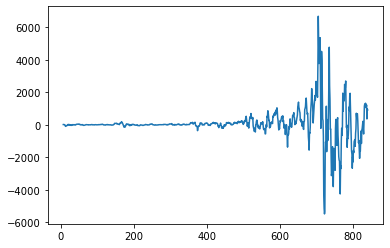

In [9]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)
 
series = dataset
X = series.values
X = X.astype('float32')
# difference data
days_in_week = 7
stationary = difference(X, days_in_week)
stationary.index = series.index[days_in_week:]

# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
#p < \alpha reject the null hypothesis (system has no unit root = stationary)
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
# save
stationary.to_csv('stationary.csv')
# plot
stationary.plot()
pyplot.show()

##### Parameter Tuning

In [10]:
def difference(dataset, interval=1):
    """compute for difference value"""
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return numpy.array(diff)


def inverse_difference(history, yhat, interval=1):
    """invert differenced value"""
    return yhat + history[-interval]


def evaluate_arima_model(X, arima_order):
    """prepare training dataset"""
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        # difference data
        months_in_year = 12
        diff = difference(history, months_in_year)
        model = ARIMA(diff, order=arima_order)
        model_fit = model.fit(trend='nc', disp=0)
        yhat = model_fit.forecast()[0]
        yhat = inverse_difference(history, yhat, months_in_year)
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    mse = mean_squared_error(test, predictions)
    rmse = sqrt(mse)
    return rmse


def evaluate_models(dataset, p_values, d_values, q_values):
    """evaluate combinations of p, d and q values for an ARIMA model"""
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s RMSE=%.3f' % (order, mse))
                except Exception as e:
                    print(e)
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))


# load dataset
series = dataset
#series = Series.from_csv('dataset.csv')
# evaluate parameters
p_values = range(0, 2)
d_values = range(0, 2)
q_values = range(0, 2)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

Estimation requires the inclusion of least one AR term, MA term, a constant or an exogenous variable.
ARIMA(0, 0, 1) RMSE=1099.965
Estimation requires the inclusion of least one AR term, MA term, a constant or an exogenous variable.
ARIMA(0, 1, 1) RMSE=719.935
ARIMA(1, 0, 0) RMSE=704.619
The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.
ARIMA(1, 1, 0) RMSE=720.632
ARIMA(1, 1, 1) RMSE=719.675
Best ARIMA(1, 0, 0) RMSE=704.619


##### Create optimal ARIMA model

In [11]:
# monkey patch around bug in ARIMA class
def __getnewargs__(self):
    return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))

ARIMA.__getnewargs__ = __getnewargs__

# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

# load data
series = dataset
# prepare data
X = series.values
X = X.astype('float32')
# difference data
months_in_year = 12
diff = difference(X, months_in_year)
# fit model
model = ARIMA(diff, order=(1, 0, 0))
model_fit = model.fit(trend='nc', disp=0)
# save model
model_fit.save('model.pkl')
# numpy.save('model_bias.npy', [bias])

##### ARIMA Model Validation

>Predicted=8822.454, Expected=8800
>Predicted=8747.800, Expected=8940
>Predicted=9750.574, Expected=9644
>Predicted=9480.579, Expected=8878
>Predicted=8915.893, Expected=9279
>Predicted=9528.467, Expected=8920
>Predicted=8576.635, Expected=9345
>Predicted=9075.628, Expected=9399
>Predicted=9554.477, Expected=9240
>Predicted=9260.358, Expected=9067
>Predicted=9596.463, Expected=9236
>Predicted=9259.560, Expected=9762
>Predicted=9575.180, Expected=9703
>Predicted=9770.241, Expected=9860
>Predicted=10490.146, Expected=9659
>Predicted=8891.544, Expected=9370
>Predicted=9731.148, Expected=9185
>Predicted=8833.168, Expected=9318
>Predicted=9711.119, Expected=9019
>Predicted=9098.549, Expected=8412
>Predicted=8333.811, Expected=8463
>Predicted=8352.833, Expected=8684
>Predicted=8884.211, Expected=8671
>Predicted=9242.508, Expected=8468
>Predicted=8513.102, Expected=8336
>Predicted=8603.416, Expected=8052
>Predicted=7996.104, Expected=8239
>Predicted=8064.778, Expected=8232
>Predicted=8138.932

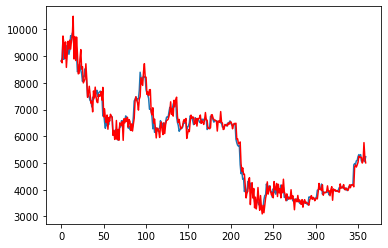

In [12]:
def difference(dataset, interval=1):
    """create a differenced series"""
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff


def inverse_difference(history, yhat, interval=1):
    """invert differenced value"""
    return yhat + history[-interval]


# load and prepare datasets
series = dataset
X = series.values.astype('float32')
history = [x for x in X]
months_in_year = 12
validation = val
y = validation.values.astype('float32')
# load model
model_fit = ARIMAResults.load('model.pkl')

# make first prediction
predictions = list()
yhat = float(model_fit.forecast()[0])
yhat = inverse_difference(history, yhat, months_in_year)
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%3.f' % (yhat, y[0]))
# rolling forecasts
for i in range(1, len(y)):
    # difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
    # predict
    model = ARIMA(diff, order=(1, 0, 0))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, months_in_year)
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
    # rport performance

mse = mean_squared_error(y, predictions)
rmse = sqrt(mse)
mae = mean_absolute_error(y, predictions)
print('MSE: %.3f' % mse)
print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % mae)
pyplot.plot(y)
pyplot.plot(predictions, color='red')
pyplot.show()

Our results show that the best ARIMA model that we have identified has an `RMSE` of 272.60 and a `MAE` of 192.42. This performance shall then be used as a baseline standard to assess our proposed models.

#### Prepare data for Machine Learning models

In [14]:
import pandas as pd
from numpy.random import seed
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
seed(42)

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

Following these procedures, we transformed the `timestamp` column into a format that uniform for all of our GDELT year data. Moreover, we have selected `tone_1`, `tone_4`, `tone_5`, `tone_6`, and `tone_7` which translates to the `Tone`, `Polarity`, `Activity  Reference  Density`, and `Self/Group  Reference  Density`.

##### GDELT 2016 data

In [19]:
df2 = pd.read_csv("data/gdelt_tones2016.csv").drop_duplicates()
df2["timestamp"] = df2["timestamp"].apply(lambda x: str(x)[:4]+"-"+str(x)[4:6]+"-"+str(x)[6:])

for i in range(1,8):
    if i not in [2,3]:
        df2["tone_"+str(i)] = df2["tone_avg_str"].apply(lambda x: float(x.split(",")[i-1]))
    
df2.sort_values("timestamp")

,timestamp,tone_avg_str,tone_1,tone_4,tone_5,tone_6,tone_7
137,2016-01-01,"-1.343669125828536,2.655836254864804,3.9995053...",-1.343669,6.655342,21.979880,0.775952,607.957274
268,2016-01-02,"-1.244108808232518,2.6459006405849093,3.890009...",-1.244109,6.535910,22.072250,0.821951,605.368377
331,2016-01-03,"-1.4312840642824494,2.522918052802079,3.954202...",-1.431284,6.477120,21.925045,0.843433,617.556213
58,2016-01-04,"-1.5264466457541412,2.4717399497096024,3.99818...",-1.526447,6.469927,21.797835,0.768344,553.286337
57,2016-01-05,"-1.5985432030514883,2.4364196737682997,4.03496...",-1.598543,6.471383,22.078865,0.735785,538.866279
...,...,...,...,...,...,...,...
169,2016-12-27,"-1.1237732721734248,2.7332262467561472,3.85699...",-1.123773,6.590226,21.515258,0.737149,668.584280
26,2016-12-28,"-1.1169575321714602,2.688876976508874,3.805834...",-1.116958,6.494711,21.602900,0.769894,533.925349
289,2016-12-29,"-1.1672518560819047,2.6724975895596423,3.83974...",-1.167252,6.512247,21.481621,0.757599,539.163295
146,2016-12-30,"-1.4869667138911464,2.4688303493439663,3.95579...",-1.486967,6.424627,21.564865,0.776261,562.009135


##### GDELT 2017 data

In [20]:
df1 = pd.read_csv("data/gdelt_tones2017.csv").drop_duplicates()
df1["timestamp"] = df1["timestamp"].apply(lambda x: str(x)[:4]+"-"+str(x)[4:6]+"-"+str(x)[6:])

for i in range(1,8):
    if i not in [2,3]:
        df1["tone_"+str(i)] = df1["tone_avg_str"].apply(lambda x: float(x.split(",")[i-1]))
    
df1.sort_values("timestamp")

,timestamp,tone_avg_str,tone_1,tone_4,tone_5,tone_6,tone_7
80,2017-01-01,"-1.2719315118484043,2.58824259527035,3.8601741...",-1.271932,6.448417,21.328459,0.801317,680.406914
321,2017-01-02,"-1.4426873277312238,2.4471191750453,3.88980650...",-1.442687,6.336926,21.557796,0.755571,560.896473
85,2017-01-03,"-1.1847022623848569,2.4422147144654325,3.62691...",-1.184702,6.069132,21.783911,0.756801,514.945857
293,2017-01-04,"-0.9560225490161227,2.5842385944973256,3.54026...",-0.956023,6.124500,21.826709,0.767244,512.429200
244,2017-01-05,"-1.1293169158896876,2.5299739214521253,3.65929...",-1.129317,6.189265,21.828723,0.769687,517.632606
...,...,...,...,...,...,...,...
93,2017-12-27,"-1.3973029728543265,2.444733304822432,3.842036...",-1.397303,6.286770,22.127338,0.771252,531.899360
261,2017-12-28,"-1.4419291906997762,2.4923967914854446,3.93432...",-1.441929,6.426723,21.995450,0.755419,537.158542
150,2017-12-29,"-1.6105565651149456,2.3830437911931686,3.99360...",-1.610557,6.376644,22.272055,0.733027,535.332284
100,2017-12-30,"-1.7285310884135454,2.3562012931335654,4.08473...",-1.728531,6.440934,22.253264,0.760869,580.592638


##### GDELT 2018-2019 data

In [21]:
df = pd.read_csv("data/gdelt_tones.csv").drop_duplicates()

for i in range(1,8):
    if i not in [2,3]:
        df["tone_"+str(i)] = df["tone_avg_str"].apply(lambda x: float(x.split(",")[i-1]))
    
df

,timestamp,tone_avg_str,tone_1,tone_4,tone_5,tone_6,tone_7
0,2018-12-03,"-0.7096127271652222,2.7281906604766846,3.43780...",-0.709613,6.165994,22.123594,0.774525,527.157898
1,2018-08-04,"-1.5860674381256104,2.3365070819854736,3.92257...",-1.586067,6.259082,22.171841,0.915246,580.626282
2,2019-02-09,"-1.4202598333358765,2.596038341522217,4.016298...",-1.420260,6.612337,22.477619,0.795376,552.240417
3,2018-08-25,"-2.0202689170837402,2.422907590866089,4.443176...",-2.020269,6.866084,22.373550,0.701497,569.803040
4,2018-12-08,"-1.6012974977493286,2.4649887084960938,4.06628...",-1.601297,6.531275,22.462433,0.723243,562.106995
...,...,...,...,...,...,...,...
466,2019-03-27,"-1.5367451906204224,2.593646764755249,4.130392...",-1.536745,6.724039,22.280561,0.744202,534.811218
467,2019-01-03,"-1.180585503578186,2.4531712532043457,3.633756...",-1.180586,6.086928,22.030870,0.731885,495.599182
468,2018-05-09,"-1.0803531408309937,2.5715484619140625,3.65190...",-1.080353,6.223450,22.248278,0.872334,559.240051
469,2018-04-07,"-1.5739831924438477,2.398348331451416,3.972331...",-1.573983,6.370680,22.394314,0.796611,567.909790


##### Append GDELT data

We concatenated these datasets. As such, we have produced a dataset from year 2016 to 2019 of GDELT data.

In [22]:
df = pd.concat([df,df1, df2], ignore_index=True).sort_values(["timestamp"]).reset_index().iloc[:,1:]
df

,timestamp,tone_avg_str,tone_1,tone_4,tone_5,tone_6,tone_7
0,2016-01-01,"-1.343669125828536,2.655836254864804,3.9995053...",-1.343669,6.655342,21.979880,0.775952,607.957274
1,2016-01-02,"-1.244108808232518,2.6459006405849093,3.890009...",-1.244109,6.535910,22.072250,0.821951,605.368377
2,2016-01-03,"-1.4312840642824494,2.522918052802079,3.954202...",-1.431284,6.477120,21.925045,0.843433,617.556213
3,2016-01-04,"-1.5264466457541412,2.4717399497096024,3.99818...",-1.526447,6.469927,21.797835,0.768344,553.286337
4,2016-01-05,"-1.5985432030514883,2.4364196737682997,4.03496...",-1.598543,6.471383,22.078865,0.735785,538.866279
...,...,...,...,...,...,...,...
1197,2019-04-12,"-1.6584209203720093,2.5250768661499023,4.18349...",-1.658421,6.708574,22.262007,0.742972,522.282959
1198,2019-04-13,"-1.784899353981018,2.4057552814483643,4.190654...",-1.784899,6.596410,22.344313,0.772733,542.421143
1199,2019-04-14,"-1.454345703125,2.4467334747314453,3.901079177...",-1.454346,6.347813,22.210037,0.764803,553.637451
1200,2019-04-15,"-1.3322839736938477,2.582634925842285,3.914918...",-1.332284,6.497554,22.145336,0.759225,520.021301


##### For BTC data

For our bitcoin data, we collected it from the `investing.com`. The code in the cell below shows how we transformed the `timestamp` column into the same format as our GDELT data. We used the `Open`, `Price`,`High`, `Low`, and `Vol.`. These features are as follows:
- `Open` : Openning(early day) price of BTC
- `Price` : Closing(late day) price of BTC
- `High` : Highest BTC price experienced throughout the day
- `Low` : Lowest BTC price experienced throughout the day
- `Vol.`: total quantity of shares or contracts traded

In [23]:
df_btc = pd.read_csv("data/BTC_USD Data.csv")


def conv_date(date):
    """Convert date"""
    date = date.split()
    months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
              "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

    m = str(months.index(date[0])+1)
    m = "0"+m if len(m) == 1 else m
    d = str(date[1][:-1])
    y = str(date[2])

    return y+"-"+m+"-"+d


df_btc["Date"] = df_btc["Date"].apply(lambda x: conv_date(x))
df_btc["Vol."] = df_btc["Vol."].replace(
    "-", "0").apply(lambda x: float(x.split("K")[0]))
df_btc["Change %"] = df_btc["Change %"].replace(
    "-", "0").apply(lambda x: float(x.split("%")[0]))
for i in ["Price", "Open", "High", "Low"]:
    df_btc[i] = df_btc[i].replace(",", "").apply(
        lambda x: float(x.replace(",", "")))

#df_btc = df_btc[["Date", "Vol.", target]]
df_btc.columns = ["timestamp"] + df_btc.columns.to_list()[1:]
df_btc = df_btc[["timestamp", "Open", "Price", "High", "Low", "Vol."]]

df_btc 

,timestamp,Open,Price,High,Low,Vol.
0,2021-01-06,33986.0,34073.0,35081.0,33901.0,17.85
1,2021-01-05,32020.0,33996.0,33996.0,30979.1,14.48
2,2021-01-04,32971.0,32020.0,33403.0,29178.0,24.68
3,2021-01-03,32183.0,32971.0,34253.0,32110.0,18.91
4,2021-01-02,29346.0,32185.0,33168.0,29192.0,22.01
...,...,...,...,...,...,...
2191,2015-01-05,261.0,273.2,276.5,260.5,2.68
2192,2015-01-04,282.0,258.8,288.9,258.8,2.38
2193,2015-01-03,314.8,282.0,314.8,282.0,1.30
2194,2015-01-02,313.6,315.1,316.0,313.0,1.32


##### Merge dataset

Finalizing our dataset, we combined our GDELT and BTC data. Shown in the table below, we also parsed the date information from the BTC data. By doing so, we have preserved the time information of our data. This is in the interest to preserve the time locality of the GDELT and BTC information.

In [24]:
df_ml = df.merge(df_btc, how="inner", on="timestamp").sort_values(
    "timestamp").reset_index().drop(["index", "tone_avg_str"], axis=1)
df_ml["year"] = df_ml["timestamp"].apply(lambda x: int(x.split("-")[0]))
df_ml["month"] = df_ml["timestamp"].apply(lambda x: int(x.split("-")[1]))
df_ml["day"] = df_ml["timestamp"].apply(lambda x: int(x.split("-")[2]))
df_ml.to_csv("df_unscaled.csv")
#df_ml.to_csv("data.csv")
df_ml

,timestamp,tone_1,tone_4,tone_5,tone_6,tone_7,Open,Price,High,Low,Vol.,year,month,day
0,2016-01-01,-1.343669,6.655342,21.979880,0.775952,607.957274,429.0,434.0,436.5,426.3,12.97,2016,1,1
1,2016-01-02,-1.244109,6.535910,22.072250,0.821951,605.368377,434.0,432.7,435.8,430.0,6.38,2016,1,2
2,2016-01-03,-1.431284,6.477120,21.925045,0.843433,617.556213,432.7,428.7,433.1,422.0,19.18,2016,1,3
3,2016-01-04,-1.526447,6.469927,21.797835,0.768344,553.286337,428.6,432.9,435.7,427.0,13.02,2016,1,4
4,2016-01-05,-1.598543,6.471383,22.078865,0.735785,538.866279,432.9,431.8,434.9,428.2,11.22,2016,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,2019-04-12,-1.658421,6.708574,22.262007,0.742972,522.282959,5059.0,5114.0,5134.9,4935.2,9.22,2019,4,12
1197,2019-04-13,-1.784899,6.596410,22.344313,0.772733,542.421143,5114.1,5101.8,5160.8,5075.3,5.21,2019,4,13
1198,2019-04-14,-1.454346,6.347813,22.210037,0.764803,553.637451,5103.7,5194.3,5209.0,5064.2,4.15,2019,4,14
1199,2019-04-15,-1.332284,6.497554,22.145336,0.759225,520.021301,5190.1,5049.2,5217.1,5000.7,9.52,2019,4,15


From these data features, we may plotted a heat map  to visualize the correlation of our variables (referto Figure 5). Here, we saw that the data features that are of the same nature (e.g. Price) is highly correlated with each other. We may assume that these components shall be interpreted as the best indicator of the forecasted price. This insight, however, is derivative. As such, we will examine in the proceeding sections how the news-related features plays their role in our best machine learning forecast model.

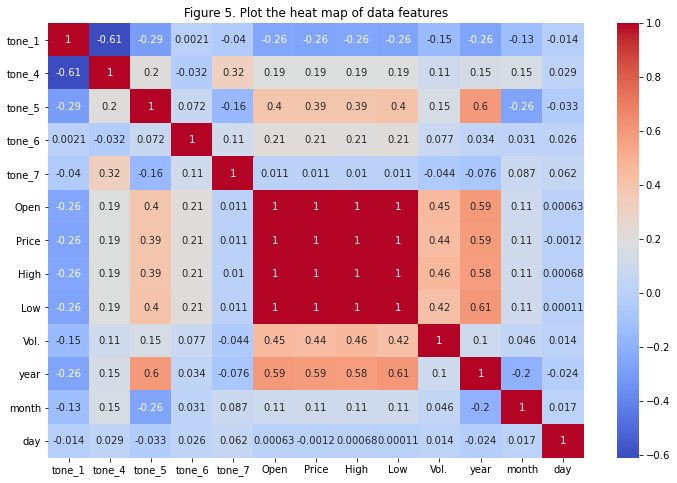

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(12, 8))

# we drop the Target column because it is not part of the features
df_corr = df_ml.corr()
ax = sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title("Figure 5. Plot the heat map of data features")
plt.show()

#### Prepare Prediction dataset

Recalling our objective, we intend to forecast the bitcoin prices at 1-day, 3-days, and 7-days ahead. Therefore, we further process the final dataframe from the preprocessing section. We matched the GDELT and Bitcoin data of each day to their intended target forecast. As shown in the proceeding cells, we have successfully produced three datasets on which we used in training our models: 1-day, 3-day, and 7-day forecast.

##### 1-day forecast

In [26]:
df_0 = df_ml.iloc[:,1:].copy()
changes1 = df_ml["Price"].values
df_0["Close_price_tomorrow"] = [changes1[i+1] if i<df_ml.shape[0]-1 else None for i in range(df_ml.shape[0])] 

df_0 = df_0.dropna()
df_0

,tone_1,tone_4,tone_5,tone_6,tone_7,Open,Price,High,Low,Vol.,year,month,day,Close_price_tomorrow
0,-1.343669,6.655342,21.979880,0.775952,607.957274,429.0,434.0,436.5,426.3,12.97,2016,1,1,432.7
1,-1.244109,6.535910,22.072250,0.821951,605.368377,434.0,432.7,435.8,430.0,6.38,2016,1,2,428.7
2,-1.431284,6.477120,21.925045,0.843433,617.556213,432.7,428.7,433.1,422.0,19.18,2016,1,3,432.9
3,-1.526447,6.469927,21.797835,0.768344,553.286337,428.6,432.9,435.7,427.0,13.02,2016,1,4,431.8
4,-1.598543,6.471383,22.078865,0.735785,538.866279,432.9,431.8,434.9,428.2,11.22,2016,1,5,428.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,-1.600174,6.664594,22.248266,0.751029,535.301331,5315.5,5065.8,5340.0,5001.1,19.39,2019,4,11,5114.0
1196,-1.658421,6.708574,22.262007,0.742972,522.282959,5059.0,5114.0,5134.9,4935.2,9.22,2019,4,12,5101.8
1197,-1.784899,6.596410,22.344313,0.772733,542.421143,5114.1,5101.8,5160.8,5075.3,5.21,2019,4,13,5194.3
1198,-1.454346,6.347813,22.210037,0.764803,553.637451,5103.7,5194.3,5209.0,5064.2,4.15,2019,4,14,5049.2


##### 3-day forecast

In [27]:
df_3 = df_ml.iloc[:,1:].copy()
changes2 = list(df_ml["Price"].values) + [None]*3
df_3["Close_price_next_3days"] = [changes2[i+3] if i<df_ml.shape[0]-1 else None for i in range(df_ml.shape[0])] 

df_3 = df_3.dropna()
df_3

,tone_1,tone_4,tone_5,tone_6,tone_7,Open,Price,High,Low,Vol.,year,month,day,Close_price_next_3days
0,-1.343669,6.655342,21.979880,0.775952,607.957274,429.0,434.0,436.5,426.3,12.97,2016,1,1,432.9
1,-1.244109,6.535910,22.072250,0.821951,605.368377,434.0,432.7,435.8,430.0,6.38,2016,1,2,431.8
2,-1.431284,6.477120,21.925045,0.843433,617.556213,432.7,428.7,433.1,422.0,19.18,2016,1,3,428.0
3,-1.526447,6.469927,21.797835,0.768344,553.286337,428.6,432.9,435.7,427.0,13.02,2016,1,4,459.0
4,-1.598543,6.471383,22.078865,0.735785,538.866279,432.9,431.8,434.9,428.2,11.22,2016,1,5,454.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,-1.593917,6.643074,22.156372,0.719125,502.867004,5312.4,5216.3,5312.5,5173.5,11.90,2019,4,9,5114.0
1194,-1.370507,6.542384,22.540806,0.776257,515.239929,5213.0,5311.7,5487.4,5200.5,15.78,2019,4,10,5101.8
1195,-1.600174,6.664594,22.248266,0.751029,535.301331,5315.5,5065.8,5340.0,5001.1,19.39,2019,4,11,5194.3
1196,-1.658421,6.708574,22.262007,0.742972,522.282959,5059.0,5114.0,5134.9,4935.2,9.22,2019,4,12,5049.2


##### 7-day forecast

In [28]:
df_7 = df_ml.iloc[:,1:].copy()
changes2 = list(df_ml["Price"].values) + [None]*7
df_7["Close_price_next_7days"] = [changes2[i+7] if i<df_ml.shape[0]-1 else None for i in range(df_ml.shape[0])] 

df_7 = df_7.dropna()
df_7

,tone_1,tone_4,tone_5,tone_6,tone_7,Open,Price,High,Low,Vol.,year,month,day,Close_price_next_7days
0,-1.343669,6.655342,21.979880,0.775952,607.957274,429.0,434.0,436.5,426.3,12.97,2016,1,1,454.0
1,-1.244109,6.535910,22.072250,0.821951,605.368377,434.0,432.7,435.8,430.0,6.38,2016,1,2,449.2
2,-1.431284,6.477120,21.925045,0.843433,617.556213,432.7,428.7,433.1,422.0,19.18,2016,1,3,449.4
3,-1.526447,6.469927,21.797835,0.768344,553.286337,428.6,432.9,435.7,427.0,13.02,2016,1,4,449.3
4,-1.598543,6.471383,22.078865,0.735785,538.866279,432.9,431.8,434.9,428.2,11.22,2016,1,5,432.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,-1.578340,6.508352,22.514711,0.731412,516.285278,4939.3,5080.4,5130.0,4930.1,11.36,2019,4,5,5114.0
1190,-1.623582,6.561295,22.208412,0.815077,556.772400,5080.4,5090.5,5280.0,4968.1,14.20,2019,4,6,5101.8
1191,-1.286160,6.579202,22.162724,0.828345,553.663635,5091.1,5238.1,5313.1,5075.0,9.95,2019,4,7,5194.3
1192,-1.303974,6.478998,22.117823,0.754297,521.377441,5238.9,5312.5,5361.7,5148.5,17.82,2019,4,8,5049.2


### Build and Evaluate ML models

In this section, we developed three machine learning models: `Random Forest`, `XGBoost`, and `Gradient Boosting Regressor`. We trained these models using different forecasting setup that we have mentioned in the previous section. Moreover, we will evaluate the performance of each of these models using their `RMSE` and `MAE` scores.

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

#!pip install xgboost
#!pip install --upgrade xgboost

#### ML for predicting price tomorrow

In [30]:
shape = df_0.shape
train_0 = df_0.iloc[:int(shape[0]*0.7)]
test_0 = df_0.iloc[int(shape[0]*0.7):]
columns = train_0.columns
print("shape of train and test df:", train_0.shape, test_0.shape)

df_0

shape of train and test df: (840, 14) (360, 14)


,tone_1,tone_4,tone_5,tone_6,tone_7,Open,Price,High,Low,Vol.,year,month,day,Close_price_tomorrow
0,-1.343669,6.655342,21.979880,0.775952,607.957274,429.0,434.0,436.5,426.3,12.97,2016,1,1,432.7
1,-1.244109,6.535910,22.072250,0.821951,605.368377,434.0,432.7,435.8,430.0,6.38,2016,1,2,428.7
2,-1.431284,6.477120,21.925045,0.843433,617.556213,432.7,428.7,433.1,422.0,19.18,2016,1,3,432.9
3,-1.526447,6.469927,21.797835,0.768344,553.286337,428.6,432.9,435.7,427.0,13.02,2016,1,4,431.8
4,-1.598543,6.471383,22.078865,0.735785,538.866279,432.9,431.8,434.9,428.2,11.22,2016,1,5,428.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,-1.600174,6.664594,22.248266,0.751029,535.301331,5315.5,5065.8,5340.0,5001.1,19.39,2019,4,11,5114.0
1196,-1.658421,6.708574,22.262007,0.742972,522.282959,5059.0,5114.0,5134.9,4935.2,9.22,2019,4,12,5101.8
1197,-1.784899,6.596410,22.344313,0.772733,542.421143,5114.1,5101.8,5160.8,5075.3,5.21,2019,4,13,5194.3
1198,-1.454346,6.347813,22.210037,0.764803,553.637451,5103.7,5194.3,5209.0,5064.2,4.15,2019,4,14,5049.2


##### Random Forest

In [31]:
rf0 = RandomForestRegressor(n_estimators=50, n_jobs=-1)
rf0.fit(train_0[columns[:-1]], train_0[columns[-1]])

RandomForestRegressor(n_estimators=50, n_jobs=-1)

In [32]:
# rmse
np.sqrt(mean_squared_error(test_0[columns[-1]], rf0.predict(test_0[columns[:-1]])))

301.65228552849817

In [33]:
mean_absolute_error(test_0[columns[-1]], rf0.predict(test_0[columns[:-1]]))

222.50999444444443

###### Hyperparameter Tuning

In [34]:
parameters = {'n_estimators': np.arange(50, 300, 50),
                           'max_depth': np.arange(50, 500, 50),
                           'min_samples_split': np.arange(2, 10, 1),
                           'min_samples_leaf': np.arange(1, 5, 1)}
grid_search_cv = (GridSearchCV(estimator=RandomForestRegressor(),
                               param_grid=parameters, verbose=1, cv=3,
                               n_jobs=-1).fit(train_0[columns[:-1]], train_0[columns[-1]]))
rf1 = grid_search_cv.best_estimator_
rf1

Fitting 3 folds for each of 1440 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   59.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  9.3min finished


RandomForestRegressor(max_depth=100, min_samples_leaf=2, min_samples_split=4,
                      n_estimators=50)

In [35]:
# rmse
np.sqrt(mean_squared_error(test_0[columns[-1]], rf1.predict(test_0[columns[:-1]])))

296.956599225871

In [36]:
# mae
mean_absolute_error(test_0[columns[-1]], rf1.predict(test_0[columns[:-1]]))

221.2244986089063

##### XGBoost

In [37]:
xg0 = XGBRegressor()
xg0.fit(train_0[columns[:-1]].values, train_0[columns[-1]].values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=32, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
np.sqrt(mean_squared_error(test_0[columns[-1]], xg0.predict(test_0[columns[:-1]].values)))

306.35182334901657

In [39]:
mean_absolute_error(test_0[columns[-1]], xg0.predict(test_0[columns[:-1]].values))

232.71493489583332

##### GBM

In [40]:
gbm0 = GradientBoostingRegressor(n_estimators=50)
gbm0.fit(train_0[columns[:-1]], train_0[columns[-1]])

GradientBoostingRegressor(n_estimators=50)

In [41]:
np.sqrt(mean_squared_error(test_0[columns[-1]], gbm0.predict(test_0[columns[:-1]])))

251.6263160997507

In [42]:
mean_absolute_error(test_0[columns[-1]], gbm0.predict(test_0[columns[:-1]]))

181.03929723369328

###### Hyperparameter Tuning

In [43]:
# GradientBoostingClassifier
parameters = {'learning_rate': np.arange(0.1, 1, 0.2),
              'n_estimators': np.arange(50, 300, 50),
              'max_depth': np.arange(50, 500, 50),
              'min_samples_leaf': np.arange(1, 5, 1)}
grid_search_cv = (GridSearchCV(estimator=GradientBoostingRegressor(),
                               param_grid=parameters, verbose=1, cv=3,
                               n_jobs=-1).fit(train_0[columns[:-1]], train_0[columns[-1]]))
gbm1 = grid_search_cv.best_estimator_
gbm1

Fitting 3 folds for each of 900 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   48.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed: 17.2min finished


GradientBoostingRegressor(learning_rate=0.30000000000000004, max_depth=50,
                          min_samples_leaf=4, n_estimators=200)

In [44]:
np.sqrt(mean_squared_error(test_0[columns[-1]], gbm1.predict(test_0[columns[:-1]])))

320.23478275044494

In [45]:
mean_absolute_error(test_0[columns[-1]], gbm1.predict(test_0[columns[:-1]]))

250.62408773713227

##### 1-day Forecast Result

Our results show that the `GBM` model produced the best performance with a `MAE` of 181.04 and `RMSE` of 251.03. In addition, we observed that the performance of the `Ranfom Forest` and ` XGBoost` are similar with each other. Lastly, the cell below shows us that most important non-price related features are `tone_6` (self/group reference density), `day`, `tone_5` (activity reference density), and `month`.

<br>
<center><b>Table 5. 1-day Forecast Result</b></center>

| Model | MAE Score| RMSE Score|
| :--: | :------: | :------: |
| Random Forest | 221.22 | 296.96|
| XGBoost | 232.71 | 306.35 |
| GBM | 181.04 | 251.63 |

In [91]:
feature_importance1 = sorted([(col,val) for col,val in zip(train_0.columns,gbm0.feature_importances_)], key=lambda x: -x[1])
pd.DataFrame(feature_importance1, columns=["column", "importance"])

,column,importance
0,Price,0.498734
1,High,0.385096
2,Low,0.110974
3,Open,0.002677
4,tone_6,0.000563
5,day,0.000562
6,tone_5,0.000439
7,month,0.000425
8,tone_1,0.000152
9,tone_4,0.000130


#### ML for predicting the next 3days

In [46]:
shape = df_3.shape
train_3 = df_3.iloc[:int(shape[0]*0.7)]
test_3 = df_3.iloc[int(shape[0]*0.7):]
columns = train_3.columns
print("shape of train and test df:", train_3.shape, test_3.shape)

df_3

shape of train and test df: (838, 14) (360, 14)


,tone_1,tone_4,tone_5,tone_6,tone_7,Open,Price,High,Low,Vol.,year,month,day,Close_price_next_3days
0,-1.343669,6.655342,21.979880,0.775952,607.957274,429.0,434.0,436.5,426.3,12.97,2016,1,1,432.9
1,-1.244109,6.535910,22.072250,0.821951,605.368377,434.0,432.7,435.8,430.0,6.38,2016,1,2,431.8
2,-1.431284,6.477120,21.925045,0.843433,617.556213,432.7,428.7,433.1,422.0,19.18,2016,1,3,428.0
3,-1.526447,6.469927,21.797835,0.768344,553.286337,428.6,432.9,435.7,427.0,13.02,2016,1,4,459.0
4,-1.598543,6.471383,22.078865,0.735785,538.866279,432.9,431.8,434.9,428.2,11.22,2016,1,5,454.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,-1.593917,6.643074,22.156372,0.719125,502.867004,5312.4,5216.3,5312.5,5173.5,11.90,2019,4,9,5114.0
1194,-1.370507,6.542384,22.540806,0.776257,515.239929,5213.0,5311.7,5487.4,5200.5,15.78,2019,4,10,5101.8
1195,-1.600174,6.664594,22.248266,0.751029,535.301331,5315.5,5065.8,5340.0,5001.1,19.39,2019,4,11,5194.3
1196,-1.658421,6.708574,22.262007,0.742972,522.282959,5059.0,5114.0,5134.9,4935.2,9.22,2019,4,12,5049.2


##### Random Forest

In [47]:
rf3 = RandomForestRegressor(n_estimators=50, n_jobs=-1)
rf3.fit(train_3[columns[:-1]], train_3[columns[-1]])

RandomForestRegressor(n_estimators=50, n_jobs=-1)

In [48]:
# rmse
np.sqrt(mean_squared_error(test_3[columns[-1]], rf3.predict(test_3[columns[:-1]])))

645.1651365835044

In [49]:
mean_absolute_error(test_3[columns[-1]], rf3.predict(test_3[columns[:-1]]))

514.2767500000004

###### Hyperparameter Tuning

In [50]:
parameters = {'n_estimators': np.arange(50, 300, 50),
                           'max_depth': np.arange(50, 500, 50),
                           'min_samples_split': np.arange(2, 10, 1),
                           'min_samples_leaf': np.arange(1, 5, 1)}
grid_search_cv = (GridSearchCV(estimator=RandomForestRegressor(),
                               param_grid=parameters, verbose=1, cv=3,
                               n_jobs=-1).fit(train_3[columns[:-1]], train_3[columns[-1]]))
rf4 = grid_search_cv.best_estimator_
rf4

Fitting 3 folds for each of 1440 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   58.0s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  9.4min finished


RandomForestRegressor(max_depth=350, min_samples_leaf=2, min_samples_split=9,
                      n_estimators=50)

In [51]:
# rmse
np.sqrt(mean_squared_error(test_3[columns[-1]], rf4.predict(test_3[columns[:-1]])))

618.5063035631165

In [52]:
mean_absolute_error(test_3[columns[-1]], rf4.predict(test_3[columns[:-1]]))

500.04587306411844

In [53]:
xg3 = XGBRegressor()
xg3.fit(train_3[columns[:-1]].values, train_3[columns[-1]].values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=32, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
np.sqrt(mean_squared_error(test_3[columns[-1]], xg0.predict(test_3[columns[:-1]].values)))

407.7883758710827

In [55]:
mean_absolute_error(test_3[columns[-1]], xg3.predict(test_3[columns[:-1]].values))

510.81130289713536

##### GBM

In [56]:
gbm3 = GradientBoostingRegressor(n_estimators=50)
gbm3.fit(train_3[columns[:-1]], train_3[columns[-1]])

GradientBoostingRegressor(n_estimators=50)

In [57]:
np.sqrt(mean_squared_error(test_3[columns[-1]], gbm3.predict(test_3[columns[:-1]])))

550.7033382794348

In [58]:
mean_absolute_error(test_3[columns[-1]], gbm3.predict(test_3[columns[:-1]]))

464.2848434281579

###### Hyperparameter Tuning

In [59]:
# GradientBoostingClassifier
parameters = {'learning_rate': np.arange(0.1, 1, 0.2),
              'n_estimators': np.arange(50, 300, 50),
              'max_depth': np.arange(50, 500, 50),
              'min_samples_leaf': np.arange(1, 5, 1)}
grid_search_cv = (GridSearchCV(estimator=GradientBoostingRegressor(),
                               param_grid=parameters, verbose=1, cv=3,
                               n_jobs=-1).fit(train_3[columns[:-1]], train_3[columns[-1]]))
gbm4 = grid_search_cv.best_estimator_
gbm4

Fitting 3 folds for each of 900 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   47.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed: 17.2min finished


GradientBoostingRegressor(max_depth=100, n_estimators=250)

In [60]:
np.sqrt(mean_squared_error(test_3[columns[-1]], gbm4.predict(test_3[columns[:-1]])))

848.2586433606958

In [61]:
mean_absolute_error(test_3[columns[-1]], gbm4.predict(test_3[columns[:-1]]))

662.5469289727522

##### 3-day Forecast Result

Our result for this section shows that we may assume two best models for each of our evaluation criteria. The best model in reference to `MAE` is found to be `GBM` while `XGBoost` was the best in terms of the `RMSE` score. We may also note that the performace of these models are poorer as compared to the models from the 1-day forecast. Lastly, the cell below shows us that most important non-price related features are `month`, `day`, `year`, and `tone6`(self/group reference density).


<br>
<center><b>Table 6. 3-day Forecast Result</b></center>

| Model | MAE Score| RMSE Score|
| :--: | :------: | :------: |
| Random Forest | 500.05 | 618.51|
| XGBoost | 510.81 | 407.79 |
| GBM | 464.28 | 550.70 |

In [97]:
feature_importance3 = sorted([(col,val) for col,val in zip(train_3.columns,xg3.feature_importances_)], key=lambda x: -x[1])
pd.DataFrame(feature_importance3, columns=["column", "importance"])

,column,importance
0,Low,0.434599
1,High,0.356292
2,Price,0.131269
3,Open,0.059570
4,month,0.014583
5,day,0.000720
6,Vol.,0.000625
7,year,0.000539
8,tone_6,0.000521
9,tone_4,0.000409


#### ML for predicting the next 7 days

In [62]:
shape = df_7.shape
train_7 = df_7.iloc[:int(shape[0]*0.7)]
test_7 = df_7.iloc[int(shape[0]*0.7):]
columns = train_7.columns
print("shape of train and test df:", train_7.shape, test_7.shape)

df_7

shape of train and test df: (835, 14) (359, 14)


,tone_1,tone_4,tone_5,tone_6,tone_7,Open,Price,High,Low,Vol.,year,month,day,Close_price_next_7days
0,-1.343669,6.655342,21.979880,0.775952,607.957274,429.0,434.0,436.5,426.3,12.97,2016,1,1,454.0
1,-1.244109,6.535910,22.072250,0.821951,605.368377,434.0,432.7,435.8,430.0,6.38,2016,1,2,449.2
2,-1.431284,6.477120,21.925045,0.843433,617.556213,432.7,428.7,433.1,422.0,19.18,2016,1,3,449.4
3,-1.526447,6.469927,21.797835,0.768344,553.286337,428.6,432.9,435.7,427.0,13.02,2016,1,4,449.3
4,-1.598543,6.471383,22.078865,0.735785,538.866279,432.9,431.8,434.9,428.2,11.22,2016,1,5,432.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,-1.578340,6.508352,22.514711,0.731412,516.285278,4939.3,5080.4,5130.0,4930.1,11.36,2019,4,5,5114.0
1190,-1.623582,6.561295,22.208412,0.815077,556.772400,5080.4,5090.5,5280.0,4968.1,14.20,2019,4,6,5101.8
1191,-1.286160,6.579202,22.162724,0.828345,553.663635,5091.1,5238.1,5313.1,5075.0,9.95,2019,4,7,5194.3
1192,-1.303974,6.478998,22.117823,0.754297,521.377441,5238.9,5312.5,5361.7,5148.5,17.82,2019,4,8,5049.2


##### Random Forest

In [63]:
rf7 = RandomForestRegressor(n_estimators=50, n_jobs=-1)
rf7.fit(train_7[columns[:-1]], train_7[columns[-1]])

RandomForestRegressor(n_estimators=50, n_jobs=-1)

In [64]:
# rmse
np.sqrt(mean_squared_error(test_7[columns[-1]], rf7.predict(test_7[columns[:-1]])))

1045.8971480701057

In [65]:
mean_absolute_error(test_7[columns[-1]], rf7.predict(test_7[columns[:-1]]))

854.721376044568

###### Hyperparameter Tuning

In [66]:
parameters = {'n_estimators': np.arange(50, 300, 50),
                           'max_depth': np.arange(50, 500, 50),
                           'min_samples_split': np.arange(2, 10, 1),
                           'min_samples_leaf': np.arange(1, 5, 1)}
grid_search_cv = (GridSearchCV(estimator=RandomForestRegressor(),
                               param_grid=parameters, verbose=1, cv=3,
                               n_jobs=-1).fit(train_7[columns[:-1]], train_7[columns[-1]]))
rf8 = grid_search_cv.best_estimator_
rf8

Fitting 3 folds for each of 1440 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  9.3min finished


RandomForestRegressor(max_depth=250, min_samples_split=6, n_estimators=50)

In [67]:
# rmse
np.sqrt(mean_squared_error(test_7[columns[-1]], rf7.predict(test_7[columns[:-1]])))

1045.8971480701057

In [68]:
mean_absolute_error(test_7[columns[-1]], rf8.predict(test_7[columns[:-1]]))

861.4949462719343

##### XGBoost

In [69]:
xg7 = XGBRegressor()
xg7.fit(train_7[columns[:-1]].values, train_7[columns[-1]].values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=32, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
np.sqrt(mean_squared_error(test_7[columns[-1]], xg0.predict(test_7[columns[:-1]].values)))

601.5780029941996

In [71]:
mean_absolute_error(test_7[columns[-1]], xg7.predict(test_7[columns[:-1]].values))

888.9050272567026

##### GBM

In [72]:
gbm7 = GradientBoostingRegressor(n_estimators=50)
gbm7.fit(train_7[columns[:-1]], train_7[columns[-1]])

GradientBoostingRegressor(n_estimators=50)

In [73]:
np.sqrt(mean_squared_error(test_7[columns[-1]], gbm7.predict(test_7[columns[:-1]])))

802.5168294283957

In [74]:
mean_absolute_error(test_7[columns[-1]], gbm7.predict(test_7[columns[:-1]]))

646.8269338516532

###### Hyperparameter Tuning

In [75]:
# GradientBoostingClassifier
parameters = {'learning_rate': np.arange(0.1, 1, 0.2),
              'n_estimators': np.arange(50, 300, 50),
              'max_depth': np.arange(50, 500, 50),
              'min_samples_leaf': np.arange(1, 5, 1)}
grid_search_cv = (GridSearchCV(estimator=GradientBoostingRegressor(),
                               param_grid=parameters, verbose=1, cv=3,
                               n_jobs=-1).fit(train_7[columns[:-1]], train_7[columns[-1]]))
gbm8 = grid_search_cv.best_estimator_
gbm8

Fitting 3 folds for each of 900 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   47.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed: 16.7min finished


GradientBoostingRegressor(learning_rate=0.5000000000000001, max_depth=300,
                          min_samples_leaf=4)

In [76]:
np.sqrt(mean_squared_error(test_7[columns[-1]], gbm8.predict(test_7[columns[:-1]])))

1143.9931227420252

In [77]:
mean_absolute_error(test_7[columns[-1]], gbm8.predict(test_7[columns[:-1]]))

912.1079818152198

##### 7-day Forecast Result

Similar with the 3-day forecast, our result for this section shows that we may assume two best models for each of our evaluation criteria. The best model in reference to `MAE` is found to be `GBM` while `XGBoost` was the best in terms of the `RMSE` score. Moreover, we found that the results that we have at this forecasting section is the worst as compared from the previous sections. Lastly, the cell below shows us that most important non-price related features are `month`, `year`, `day`, and `tone_5` (activity reference density).

<br>
<center><b>Table 7. 7-day Forecast Result</b></center>

| Model | MAE Score| RMSE Score|
| :--: | :------: | :------: |
| Random Forest | 854.72 | 1045.90|
| XGBoost | 888.91 | 601.58 |
| GBM | 646.83 | 802.52 |

In [98]:
feature_importance7 = sorted([(col,val) for col,val in zip(train_7.columns,xg7.feature_importances_)], key=lambda x: -x[1])
pd.DataFrame(feature_importance7, columns=["column", "importance"])

,column,importance
0,High,0.526581
1,Low,0.281089
2,Price,0.127703
3,month,0.042591
4,year,0.010716
5,Open,0.007576
6,day,0.001689
7,tone_5,0.000584
8,Vol.,0.000507
9,tone_6,0.000298


### Conclusion and Recommendation

This project demonstrated how we can use Big Data and Machine Learning in developing an analytics pipeline in forecasting bitcoin data. From our three elected machine learning models (`RandomForest`, `XGBoost`, and `GradientBoostingRegressor`), we have observed how the daily GDELT news from the top bitcoin trading countries and daily bitcoin information is capable of forecasting the bitcoin price at a later date. Moreover, we found that the `GradientBoostingRegressor` gave the best RMSE score in estimating the BTC price at 1-day ahead while `XGBoost` dominates the forecast for the next 3 and 7 days.
It was also evident that the further ahead is our forecast, the less accurate our models become. We may account this observation to the fact that our gathered news may have lost their significance at later dates. 
<br>
<br>
From each of the forecast model, we have detected that time-relataed features are important for our models. The `day` and `month` information are paticularly essential for the good performance of our models. For the news tones, `tones_5` and `tones_6` outweighs other news-related features. These highly regarded tones are the `activity reference density` and the `self/group reference density`. From this insight, we can conclude that the manner of delivery of how the news are presented matters. Thus, we may look into these factors and add other journalistic indicators and establish an indicator using news data.
<br>
<br>
To further this study, we recommend that the data should be extended at wider time range (e.g. 2012 to 2020) in order to capture more bitcoin price movements. Expand the news-related features in our data. By doing so, we estimate that it will produce a much better accuracy. Lastly, exploring memory-based Neural Networks like LSTM or RNN for this project will help us in decrypting the seemingly random behavior of bitcoin prices.

### References

[1] Bloomenthal, A. (2020, June 16). What Determines the Price of 1 Bitcoin? (Investopedia) Retrieved January 25, 2021, from https://www.investopedia.com/tech/what-determines-value-1-bitcoin/

[2] Frankenfield, J. (2020, May 11). What is Bitcoin? . (Investopedia) Retrieved January 25, 2021, from https://www.investopedia.com/terms/b/bitcoin.asp

[3] Hayes, A. (2020, December 17). What Happens to Bitcoin After All 21 Million Are Mined? (Investopedia) Retrieved January 25, 2021, from https://www.investopedia.com/tech/what-happens-bitcoin-after-21-million-mined/

[4] The GDELT Project. (n.d.). Retrieved January 25, 2021, from https://www.gdeltproject.org/
    
[5] Exchange, B. (2020, January 23). 7 Countries with the Most Bitcoin Hodlers. Retrieved January 25, 2021, from https://medium.com/@biditex/7-countries-with-the-most-bitcoin-hodlers-503b205d926f
    
[6] Introducing a New Amazon EC2 T2 Instance: T2.large. (2015, June 16). Retrieved November 30, 2020, from https://aws.amazon.com/about-aws/whats-new/2015/06/introducing-a-new-amazon-ec2-t2-instance-t2-large/

[7] Amazon EC2 Instance Types. (n.d.). Retrieved January 25, 2021, from https://aws.amazon.com/ec2/instance-types/

[8] Tuwiner, J. (2021, January 17). Who Accepts Bitcoin? 11 Major Companies. Retrieved from Buy Bitcoin Worldwide: https://www.buybitcoinworldwide.com/who-accepts-bitcoin/